# MM&A Supermarket Case

### Table of Scontent
1. [Exploring the Data](#1.-Exploring-the-Data-(EDA))<br>
2. [Product Selection](#2.-Product-Selection)<br>
    [Method 1: Product Selection in most demand](#Method-1:-Product-Selection-in-most-demand)<br>
3. [Calculate the metrics](#3-Calculate-the-metrics)

## 1. Exploring the Data (EDA)

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading in the csv file into a dataframe
file = '../mma_mart.csv'
df = pd.read_csv(file)

In [4]:
# observing the data structure
df.head()

,order_id,product_id,product_name,aisle_id,aisle,department_id,department
0,1,49302,Bulgarian Yogurt,120,yogurt,16,dairy eggs
1,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs
2,1,10246,Organic Celery Hearts,83,fresh vegetables,4,produce
3,1,49683,Cucumber Kirby,83,fresh vegetables,4,produce
4,1,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods


In [5]:
# finding the shape of the data set (row and column)
df.shape

(987259, 7)

In [6]:
df['department'].value_counts()

produce            288775
dairy eggs         164468
snacks              88093
beverages           81923
frozen              68202
pantry              56681
bakery              35806
canned goods        32486
deli                32008
dry goods pasta     26096
household           22445
meat seafood        21588
breakfast           21585
personal care       13773
babies              12872
international        8248
alcohol              4580
pets                 3157
missing              2289
other                1097
bulk                 1087
Name: department, dtype: int64

In [7]:
df[df['department'] == 'produce']['aisle'].value_counts().sum()

288775

The data shows 987259 rows and 7 columns.

In [8]:
# finding amount of unique entries in each column
df.nunique()

order_id         97833
product_id       35070
product_name     35070
aisle_id           134
aisle              134
department_id       21
department          21
dtype: int64

There are ~98000 orders and ~35000 unique products which is across 134 aisles that belong to 21 departments. This shows that selecting 1000-1200 products for the instabasket aisle is selecting only 1000/35000 = ~3% of the total product selection offered at MM&A supermarket.

Next, exploring the aisle and departments to maybe gain some insight on what products should be considered as refrigerant and frozen products.

In [9]:
df['aisle'].unique()

array(['yogurt', 'other creams cheeses', 'fresh vegetables',
       'canned meat seafood', 'fresh fruits', 'packaged cheese', 'eggs',
       'spices seasonings', 'oils vinegars', 'baking ingredients',
       'doughs gelatins bake mixes', 'spreads',
       'packaged vegetables fruits', 'soy lactosefree', 'poultry counter',
       'bread', 'breakfast bakery', 'cold flu allergy',
       'energy granola bars', 'breakfast bars pastries', 'chips pretzels',
       'trail mix snack mix', 'crackers', 'refrigerated',
       'energy sports drinks', 'salad dressing toppings',
       'prepared soups salads', 'milk', 'paper goods',
       'water seltzer sparkling water', 'kosher foods',
       'packaged poultry', 'instant foods', 'packaged produce',
       'cookies cakes', 'candy chocolate', 'body lotions soap',
       'dry pasta', 'laundry', 'air fresheners candles', 'frozen produce',
       'buns rolls', 'canned fruit applesauce', 'juice nectars',
       'granola', 'fresh herbs', 'baby food formul

As can be seen from the aisle names, there are aisles with "frozen" such as `frozen produce` or `frozen meat seafood` in it which all products listed under these aisles would be considered for the 100 frozen product for instabasket. The same can't be said for refridgerant as there a lot of aisles to parse through so it might be better to look at the department to determine what department contains refridgerant products.

In [10]:
df['department'].unique()

array(['dairy eggs', 'produce', 'canned goods', 'pantry', 'meat seafood',
       'bakery', 'personal care', 'snacks', 'breakfast', 'beverages',
       'deli', 'household', 'international', 'dry goods pasta', 'frozen',
       'babies', 'pets', 'alcohol', 'bulk', 'missing', 'other'],
      dtype=object)

From the look at department names, `dairy eggs`, `produce`, `meat seafood`, `deli`, `frozen`, `missing` and `other` are all potential products for fridge and freezer space so it might be better to take a closer look at the products in those department.

In [11]:
dept_list = ['dairy eggs', 'produce', 'meat seafood', 'deli', 'frozen', 'missing', 'other']

In [12]:
# looking at products and aisles of those products for insight as well as how many products each department had
for department in dept_list:
    print(f"Department: {department}")
    print(f"Number of products: {df[df['department']==department]['product_name'].nunique()}\n")
    display(df[df['department']==department][['product_name', 'aisle']])

Department: dairy eggs
Number of products: 2886



,product_name,aisle
0,Bulgarian Yogurt,yogurt
1,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses
7,Organic Whole String Cheese,packaged cheese
8,Organic Egg Whites,eggs
17,Total 2% with Strawberry Lowfat Greek Strained...,yogurt
...,...,...
987240,Large Grade AA Organic Eggs,eggs
987241,Reduced Fat Mozarella String Cheese,packaged cheese
987242,Vanilla Light & Fit Greek Yogurt,yogurt
987243,Non-Fat Vanilla Blended Greek Yogurt,yogurt


Department: produce
Number of products: 1437



,product_name,aisle
2,Organic Celery Hearts,fresh vegetables
3,Cucumber Kirby,fresh vegetables
5,Bag of Organic Bananas,fresh fruits
6,Organic Hass Avocado,fresh fruits
9,Michigan Organic Kale,fresh vegetables
...,...,...
987245,Gala Apples,fresh fruits
987246,Organic Yellow Onion,fresh vegetables
987247,Organic Baby Carrots,packaged vegetables fruits
987249,Organic Baby Spinach,packaged vegetables fruits


Department: meat seafood
Number of products: 692



,product_name,aisle
23,Air Chilled Organic Boneless Skinless Chicken ...,poultry counter
46,Boneless Skinless Chicken Breast Fillets,packaged poultry
97,Boneless Beef Sirloin Steak,meat counter
176,Low Sodium Bacon,hot dogs bacon sausage
204,Boneless And Skinless Chicken Breast,poultry counter
...,...,...
986977,Organic Air Chilled Whole Chicken,poultry counter
987067,Natural Hickory Smoked Canadian Bacon Center C...,hot dogs bacon sausage
987068,All Natural Boneless & Skinless Chicken Breast...,packaged poultry
987175,Organic Air Chilled Whole Chicken,poultry counter


Department: deli
Number of products: 1069



,product_name,aisle
40,Fresh Fruit Salad,prepared soups salads
101,Mango Pineapple Salsa,fresh dips tapenades
179,"Basil, Asiago & Pine Nut Pesto Ravioli",prepared meals
191,Yuba Tofu Skin,tofu meat alternatives
192,Organic Firm Tofu,tofu meat alternatives
...,...,...
987153,Spicy Avocado Hummus,fresh dips tapenades
987158,Guacamole,fresh dips tapenades
987199,Guacamole Dip,fresh dips tapenades
987204,Original Hummus,fresh dips tapenades


Department: frozen
Number of products: 3127



,product_name,aisle
68,Pineapple Chunks,frozen produce
100,Teriyaki & Pineapple Chicken Meatballs,frozen meals
114,All Natural Boneless Skinless Chicken Breasts,frozen meat seafood
118,Combination Pizza Rolls,frozen appetizers sides
135,Organic Mini Homestyle Waffles,frozen breakfast
...,...,...
987176,Organic Ice Cream Vanilla Bean,ice cream ice
987180,Dairy Free Coconut Milk Frozen Dessert Minis,ice cream ice
987184,Organic Mango Chunks,frozen produce
987210,Bag of Large Lemons,frozen meat seafood


Department: missing
Number of products: 518



,product_name,aisle
654,Tomato Basil Bisque Soup,missing
1511,Cold Pressed Watermelon & Lemon Juice Blend,missing
1512,Paleo Blueberry Muffin,missing
2126,"Magic Tape Refillable Dispenser 3/4\"" x 850\""",missing
4121,Organic Poblano Pepper,missing
...,...,...
986067,Oatneal Cookie Ice Cream,missing
986086,Dairy Free Unsweetened Almond Milk Beverage,missing
986103,Organic Asian Chopped Salad Kit,missing
986275,Lemon Bag,missing


Department: other
Number of products: 303



,product_name,aisle
691,Coffee Mate French Vanilla Creamer Packets,other
1077,SleepGels Nighttime Sleep Aid,other
1926,Roasted Unsalted Almonds,other
1985,"Camilia, Single Liquid Doses",other
2127,Maximum Strength Original Paste Diaper Rash Oi...,other
...,...,...
983992,Roasted Unsalted Almonds,other
984112,Boneless Pork Tenderloin,other
984515,Roasted Almond Butter,other
984534,Light CocoWhip! Coconut Whipped Topping,other


Looking at the results, products from `dairy eggs`, `meat seafood` `deli`, and some products from `missing` and `other` (would need to look at what exactly the product is since there was "Oatneal Cookie Ice Cream" in `missing` aisle which is a frozen item and "Boneless Pork Tenderloin" in `other` which is a `meat seafood` item) would be the departments that require refridgerant. Produce might not be a neccisity to be refridgerated as it can be stored at room temperature but only refridgerated to prolong shelf life so if there is a lot of demand for the produce, then it wouldn't be on the shelf for long but if there is low demand for it, then it might be better to not even have it as a selection so it might be a better idea to give the refridgerator space to the other aisles.

In [13]:
# Sanity check to see if aisles such as frozen produce are part of the frozen department or produce department
frozen_aisles = df[df['aisle'].str.contains('frozen', case=False)]['aisle'].unique()
print(frozen_aisles)

['frozen produce' 'frozen meals' 'frozen meat seafood'
 'frozen appetizers sides' 'frozen breakfast' 'frozen breads doughs'
 'frozen vegan vegetarian' 'frozen pizza' 'frozen dessert' 'frozen juice']


In [14]:
frozen_department = df[df['aisle'].str.contains('frozen', case=False)]['department'].unique()
print(frozen_department)

['frozen']


It is safe to assume that 100 products for the frozen products will be from the frozen department and maybe `missing` and `other` department.

In [15]:
# storing all frozen products into a variable
freezer_df = df[df['department']=='frozen']
freezer_df

,order_id,product_id,product_name,aisle_id,aisle,department_id,department
68,7,46802,Pineapple Chunks,116,frozen produce,1,frozen
100,11,30162,Teriyaki & Pineapple Chicken Meatballs,38,frozen meals,1,frozen
114,12,38050,All Natural Boneless Skinless Chicken Breasts,34,frozen meat seafood,1,frozen
118,12,29471,Combination Pizza Rolls,129,frozen appetizers sides,1,frozen
135,14,162,Organic Mini Homestyle Waffles,52,frozen breakfast,1,frozen
...,...,...,...,...,...,...,...
987176,99993,43749,Organic Ice Cream Vanilla Bean,37,ice cream ice,1,frozen
987180,99993,5537,Dairy Free Coconut Milk Frozen Dessert Minis,37,ice cream ice,1,frozen
987184,99993,26128,Organic Mango Chunks,116,frozen produce,1,frozen
987210,99996,9434,Bag of Large Lemons,34,frozen meat seafood,1,frozen


In [16]:
# calculating the percentage of products which are frozen
freezer_percent = freezer_df.shape[0]/df.shape[0]*100
print(f"{freezer_percent:.2f}% only are being sold at frozen department")

6.91% only are being sold at frozen department


In [17]:
# storing all fridge products into a variable
fridge_df = df[df['department'].isin(['dairy eggs', 'meat seafood', 'deli'])]
fridge_df

,order_id,product_id,product_name,aisle_id,aisle,department_id,department
0,1,49302,Bulgarian Yogurt,120,yogurt,16,dairy eggs
1,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs
7,1,22035,Organic Whole String Cheese,21,packaged cheese,16,dairy eggs
8,2,33120,Organic Egg Whites,86,eggs,16,dairy eggs
17,3,33754,Total 2% with Strawberry Lowfat Greek Strained...,120,yogurt,16,dairy eggs
...,...,...,...,...,...,...,...
987241,99999,10034,Reduced Fat Mozarella String Cheese,21,packaged cheese,16,dairy eggs
987242,99999,44085,Vanilla Light & Fit Greek Yogurt,120,yogurt,16,dairy eggs
987243,99999,9558,Non-Fat Vanilla Blended Greek Yogurt,120,yogurt,16,dairy eggs
987253,100000,30489,Original Hummus,67,fresh dips tapenades,20,deli


In [18]:
# calculating the percentage of products which are frozen
fridge_percent = fridge_df.shape[0]/df.shape[0]*100
print(f"{fridge_percent:.2f}% only are being sold at fridge department")

22.09% only are being sold at fridge department


In [19]:
# removing the freezer and fridge products from the main df as this will be for the 1000 in aisle product selection
remove_index = freezer_df.index.union(fridge_df.index)
filtered_df = df.drop(remove_index)
filtered_df

,order_id,product_id,product_name,aisle_id,aisle,department_id,department
2,1,10246,Organic Celery Hearts,83,fresh vegetables,4,produce
3,1,49683,Cucumber Kirby,83,fresh vegetables,4,produce
4,1,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods
5,1,13176,Bag of Organic Bananas,24,fresh fruits,4,produce
6,1,47209,Organic Hass Avocado,24,fresh fruits,4,produce
...,...,...,...,...,...,...,...
987252,100000,19508,Corn Tortillas,128,tortillas flat bread,3,bakery
987255,100000,38734,Wheat Sandwich Thins,128,tortillas flat bread,3,bakery
987256,100000,36759,Unscented Long Lasting Stick Deodorant,80,deodorants,11,personal care
987257,100000,37107,Ground Cumin,104,spices seasonings,13,pantry


In [20]:
# calculating the percentage of products which are fridge
other_percent = filtered_df.shape[0]/df.shape[0]*100
print(f"{other_percent:.2f}% are being sold at other departments")

71.00% are being sold at other departments


In [21]:
# Sanity Check to see if the rows were removed correctly
freezer_df.shape[0] + fridge_df.shape[0] + filtered_df.shape[0] == df.shape[0]

True

In [22]:
# Check to see if the right departments are removed
filtered_df['department'].unique()

array(['produce', 'canned goods', 'pantry', 'bakery', 'personal care',
       'snacks', 'breakfast', 'beverages', 'household', 'international',
       'dry goods pasta', 'babies', 'pets', 'alcohol', 'bulk', 'missing',
       'other'], dtype=object)

In [23]:
filtered_df[filtered_df['department_id'] == 4]['aisle'].value_counts()

fresh fruits                  110888
fresh vegetables              103891
packaged vegetables fruits     54207
fresh herbs                    11339
packaged produce                8450
Name: aisle, dtype: int64

In [24]:
filtered_df[filtered_df['department_id'] == 4]['product_name'].value_counts().head(20)

Banana                      14494
Bag of Organic Bananas      11694
Organic Strawberries         8081
Organic Baby Spinach         7369
Organic Hass Avocado         6411
Organic Avocado              5313
Large Lemon                  4688
Strawberries                 4340
Limes                        4225
Organic Raspberries          4164
Organic Yellow Onion         3360
Organic Garlic               3290
Organic Zucchini             3203
Organic Blueberries          3107
Cucumber Kirby               2905
Organic Lemon                2718
Organic Fuji Apple           2692
Apple Honeycrisp Organic     2579
Organic Grape Tomatoes       2553
Seedless Red Grapes          2520
Name: product_name, dtype: int64

It did remove the aisle 

In [25]:
print(freezer_percent)
print(fridge_percent)
print(other_percent)

6.908217600447299
22.08782092642356
71.00396147312914


In [26]:
Category = ['Freeze', 'Refrigeration', 'Other']
Values = [round(freezer_percent,2), round(fridge_percent,2), round(other_percent,2)]

Data = pd.DataFrame({'Category': Category, 'Values': Values})
Data

,Category,Values
0,Freeze,6.91
1,Refrigeration,22.09
2,Other,71.00


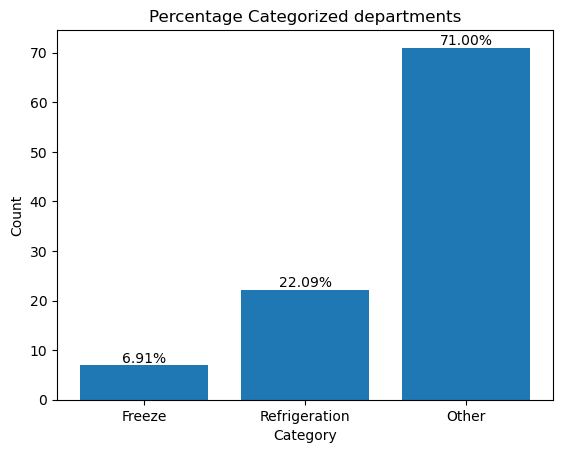

In [27]:
plt.figure()
plt.bar(Data.Category, Data.Values)
# Add labels to the bars
for i, value in enumerate(Values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title('Percentage Categorized departments') # title
plt.xlabel('Category') # labeling x-axis
plt.ylabel('Count') # labeling y-axis
plt.show()

In [28]:
df

,order_id,product_id,product_name,aisle_id,aisle,department_id,department
0,1,49302,Bulgarian Yogurt,120,yogurt,16,dairy eggs
1,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs
2,1,10246,Organic Celery Hearts,83,fresh vegetables,4,produce
3,1,49683,Cucumber Kirby,83,fresh vegetables,4,produce
4,1,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods
...,...,...,...,...,...,...,...
987254,100000,30169,Total 2% All Natural Plain Greek Yogurt,120,yogurt,16,dairy eggs
987255,100000,38734,Wheat Sandwich Thins,128,tortillas flat bread,3,bakery
987256,100000,36759,Unscented Long Lasting Stick Deodorant,80,deodorants,11,personal care
987257,100000,37107,Ground Cumin,104,spices seasonings,13,pantry


## 2. Product Selection

In [29]:
# import the library needed to split
# from sklearn.model_selection import train_test_split

# splitting the data
# train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [30]:
# Sampling and split the data

train_order_ids = df['order_id'].sample(n=int(df['order_id'].nunique()*.8), random_state=1)
train_mask = df['order_id'].isin(train_order_ids)
train_data = df[train_mask]
print(train_data.shape)
test_data = df[~train_mask]
print(test_data.shape)

(647192, 7)
(340067, 7)


### Method 1: Product Selection in most demand

This method is to get a variety of items that are most in demand.

In [31]:
# storing all frozen products into a variable
freezer_df = train_data[train_data['department']=='frozen']
freezer_df.head()


,order_id,product_id,product_name,aisle_id,aisle,department_id,department
68,7,46802,Pineapple Chunks,116,frozen produce,1,frozen
135,14,162,Organic Mini Homestyle Waffles,52,frozen breakfast,1,frozen
136,14,2452,Naturals Chicken Nuggets,129,frozen appetizers sides,1,frozen
140,14,10096,Corn Meal Pizza Crust,58,frozen breads doughs,1,frozen
142,14,20995,Organic Broccoli Florets,116,frozen produce,1,frozen


In [32]:
# calculating the percentage of products which are frozen
print(f"{freezer_df.shape[0]/train_data.shape[0]*100:.2f}% only are being sold at frozen department")

6.97% only are being sold at frozen department


In [33]:
# Shows the highest 100 selling product in frozen department
top_freezer = freezer_df.groupby(['aisle_id', 'aisle', 'product_id', 'product_name', 'department_id', 'department'])\
    .size().reset_index(name='count')\
    .sort_values(by='count', ascending=False).head(100)
top_freezer

,aisle_id,aisle,product_id,product_name,department_id,department,count
2292,116,frozen produce,9076,Blueberries,1,frozen,1148
2353,116,frozen produce,20995,Organic Broccoli Florets,1,frozen,704
2371,116,frozen produce,24489,Organic Whole Strawberries,1,frozen,698
2342,116,frozen produce,17948,Frozen Organic Wild Blueberries,1,frozen,652
2505,116,frozen produce,46802,Pineapple Chunks,1,frozen,477
...,...,...,...,...,...,...,...
871,37,ice cream ice,47652,Coconut Almond Minis Frozen Dessert Bars,1,frozen,85
1511,38,frozen meals,49273,Light and Lean Quinoa Black Beans with Buttern...,1,frozen,85
939,38,frozen meals,3717,Cheese Enchilada Meal,1,frozen,84
1191,38,frozen meals,22559,Kitchen Cheese Enchilada,1,frozen,82


In [34]:
# Let's see how many product sold from one aisle
freezer_value_count = top_freezer['aisle'].value_counts()
pd.DataFrame({'aisle': freezer_value_count.index, 'count': freezer_value_count.values})

,aisle,count
0,frozen produce,27
1,ice cream ice,19
2,frozen meals,15
3,frozen breakfast,13
4,frozen appetizers sides,11
5,frozen pizza,8
6,frozen meat seafood,3
7,frozen vegan vegetarian,2
8,frozen breads doughs,1
9,frozen dessert,1


The insight shows that `frozen produce` and `ice cream ice` are the highest selling point.

In [35]:
# storing all fridge products into a variable
fridge_df = train_data[train_data['department'].isin(['dairy eggs', 'meat seafood', 'deli'])]

In [36]:
fridge_df.sample(5)

,order_id,product_id,product_name,aisle_id,aisle,department_id,department
538778,54553,46676,Total 0% Nonfat Greek Yogurt,120,yogurt,16,dairy eggs
924976,93826,40604,Feta Cheese Crumbles,21,packaged cheese,16,dairy eggs
344562,34847,29126,Organic Strawberry Chia Lowfat 2% Cottage Cheese,108,other creams cheeses,16,dairy eggs
872190,88536,33090,Light & Fit Strawberry Non Fat Greek Yogurt,120,yogurt,16,dairy eggs
926236,93947,41488,Chocolate Milk,84,milk,16,dairy eggs


In [37]:
# calculating the percentage of products which are fridge
print(f"{fridge_df.shape[0]/train_data.shape[0]*100:.2f}%\
 are being sold at fridge department that is more than frozen department")

22.05% are being sold at fridge department that is more than frozen department


In [38]:
# Shows the highest 100 selling product in fridge department (dairy eggs, meat seafood, deli)
top_fridge = fridge_df.groupby(['aisle_id', 'aisle', 'product_id', 'product_name', 'department_id', 'department'])\
    .size().reset_index(name='count')\
    .sort_values(by='count', ascending=False).head(100)

top_fridge

,aisle_id,aisle,product_id,product_name,department_id,department,count
2254,84,milk,27845,Organic Whole Milk,16,dairy eggs,2572
1954,67,fresh dips tapenades,30489,Original Hummus,20,deli,1468
1803,53,cream,49235,Organic Half & Half,16,dairy eggs,1450
1749,53,cream,27086,Half & Half,16,dairy eggs,1306
1026,21,packaged cheese,22035,Organic Whole String Cheese,16,dairy eggs,1271
...,...,...,...,...,...,...,...
1968,67,fresh dips tapenades,33129,Classic Hummus,20,deli,268
2187,84,milk,13249,Skim Milk,16,dairy eggs,267
2185,84,milk,13166,"Organic Milk Reduced Fat, 2% Milkfat",16,dairy eggs,266
2562,91,soy lactosefree,19677,Original Pure Creamy Almond Milk,16,dairy eggs,266


In [39]:
# Let's see how many products sold from an aisle
fridge_value_count = top_fridge['aisle'].value_counts()
pd.DataFrame({'aisle': fridge_value_count.index, 'count': fridge_value_count.values})

,aisle,count
0,yogurt,18
1,milk,16
2,packaged cheese,12
3,soy lactosefree,8
4,eggs,8
5,hot dogs bacon sausage,7
6,fresh dips tapenades,6
7,lunch meat,6
8,butter,6
9,cream,4


The insight shows that `yogurt`, `milk` and `packaged cheese` are the highest selling point.

In [40]:
combine_frozen_fridge = pd.concat([top_freezer,top_fridge], ignore_index=True)
combine_frozen_fridge

,aisle_id,aisle,product_id,product_name,department_id,department,count
0,116,frozen produce,9076,Blueberries,1,frozen,1148
1,116,frozen produce,20995,Organic Broccoli Florets,1,frozen,704
2,116,frozen produce,24489,Organic Whole Strawberries,1,frozen,698
3,116,frozen produce,17948,Frozen Organic Wild Blueberries,1,frozen,652
4,116,frozen produce,46802,Pineapple Chunks,1,frozen,477
...,...,...,...,...,...,...,...
195,67,fresh dips tapenades,33129,Classic Hummus,20,deli,268
196,84,milk,13249,Skim Milk,16,dairy eggs,267
197,84,milk,13166,"Organic Milk Reduced Fat, 2% Milkfat",16,dairy eggs,266
198,91,soy lactosefree,19677,Original Pure Creamy Almond Milk,16,dairy eggs,266


We combined 200 products in demand in 2 departments `frozen` and `refrigerator` ('dairy eggs', 'meat seafood', 'deli')

In [41]:
# Combined products which shows number of product in each aisle
value_count = combine_frozen_fridge['aisle'].value_counts()
pd.DataFrame({'aisle': value_count.index, 'count': value_count.values})

,aisle,count
0,frozen produce,27
1,ice cream ice,19
2,yogurt,18
3,milk,16
4,frozen meals,15
5,frozen breakfast,13
6,packaged cheese,12
7,frozen appetizers sides,11
8,frozen pizza,8
9,eggs,8


In [42]:
other_df = train_data[~train_data['department'].isin(['dairy eggs', 'meat seafood', 'deli', 'frozen'])]
other_df

,order_id,product_id,product_name,aisle_id,aisle,department_id,department
2,1,10246,Organic Celery Hearts,83,fresh vegetables,4,produce
3,1,49683,Cucumber Kirby,83,fresh vegetables,4,produce
4,1,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods
5,1,13176,Bag of Organic Bananas,24,fresh fruits,4,produce
6,1,47209,Organic Hass Avocado,24,fresh fruits,4,produce
...,...,...,...,...,...,...,...
987252,100000,19508,Corn Tortillas,128,tortillas flat bread,3,bakery
987255,100000,38734,Wheat Sandwich Thins,128,tortillas flat bread,3,bakery
987256,100000,36759,Unscented Long Lasting Stick Deodorant,80,deodorants,11,personal care
987257,100000,37107,Ground Cumin,104,spices seasonings,13,pantry


In [43]:
# calculating the percentage of products which are fridge
print(f"{other_df.shape[0]/train_data.shape[0]*100:.2f}% are being sold at other departments")

70.98% are being sold at other departments


In [44]:
# let us see the most 800 selling products
top_other = other_df.groupby(['aisle_id', 'aisle', 'product_id', 'product_name', 'department_id', 'department']).size().reset_index(name='count')\
    .sort_values(by='count', ascending=False).head(800)

top_other

,aisle_id,aisle,product_id,product_name,department_id,department,count
3908,24,fresh fruits,24852,Banana,4,produce,9028
3836,24,fresh fruits,13176,Bag of Organic Bananas,4,produce,7152
3887,24,fresh fruits,21137,Organic Strawberries,4,produce,5233
22376,123,packaged vegetables fruits,21903,Organic Baby Spinach,4,produce,4797
4049,24,fresh fruits,47209,Organic Hass Avocado,4,produce,4282
...,...,...,...,...,...,...,...
1595,9,pasta sauce,8204,Traditional Favorites Tomato & Basil Pasta Sauce,9,dry goods pasta,90
23213,128,tortillas flat bread,26315,Organic White Corn & Wheat Tortillas,3,bakery,90
11918,72,condiments,43262,Original Sauce,13,pantry,90
23131,128,tortillas flat bread,3880,Corn Maize Tortillas,3,bakery,90


In [45]:
# Let's see how many products sold from an aisle
value_count = top_other['aisle'].value_counts()
pd.DataFrame({'aisle': value_count.index, 'count': value_count.values})

,aisle,count
0,fresh vegetables,135
1,fresh fruits,76
2,packaged vegetables fruits,54
3,chips pretzels,36
4,water seltzer sparkling water,33
...,...,...
58,white wines,1
59,laundry,1
60,red wines,1
61,asian foods,1


In [46]:
# merging the most in demand products
combine_df = pd.concat([top_other,combine_frozen_fridge], ignore_index=True)
combine_df

,aisle_id,aisle,product_id,product_name,department_id,department,count
0,24,fresh fruits,24852,Banana,4,produce,9028
1,24,fresh fruits,13176,Bag of Organic Bananas,4,produce,7152
2,24,fresh fruits,21137,Organic Strawberries,4,produce,5233
3,123,packaged vegetables fruits,21903,Organic Baby Spinach,4,produce,4797
4,24,fresh fruits,47209,Organic Hass Avocado,4,produce,4282
...,...,...,...,...,...,...,...
995,67,fresh dips tapenades,33129,Classic Hummus,20,deli,268
996,84,milk,13249,Skim Milk,16,dairy eggs,267
997,84,milk,13166,"Organic Milk Reduced Fat, 2% Milkfat",16,dairy eggs,266
998,91,soy lactosefree,19677,Original Pure Creamy Almond Milk,16,dairy eggs,266


In [47]:
# show top 20 of aisle per department
aisle_department_counts = combine_df.groupby('aisle')['department'].value_counts().reset_index(name='count')\
    .sort_values(by='count', ascending=False).head(20)
aisle_department = aisle_department_counts.copy()

In [48]:
aisle_department

,aisle,department,count
32,fresh vegetables,produce,135
30,fresh fruits,produce,76
63,packaged vegetables fruits,produce,54
16,chips pretzels,snacks,36
85,water seltzer sparkling water,beverages,33
4,bread,bakery,29
40,frozen produce,frozen,27
71,refrigerated,beverages,26
20,crackers,snacks,25
26,energy granola bars,snacks,20


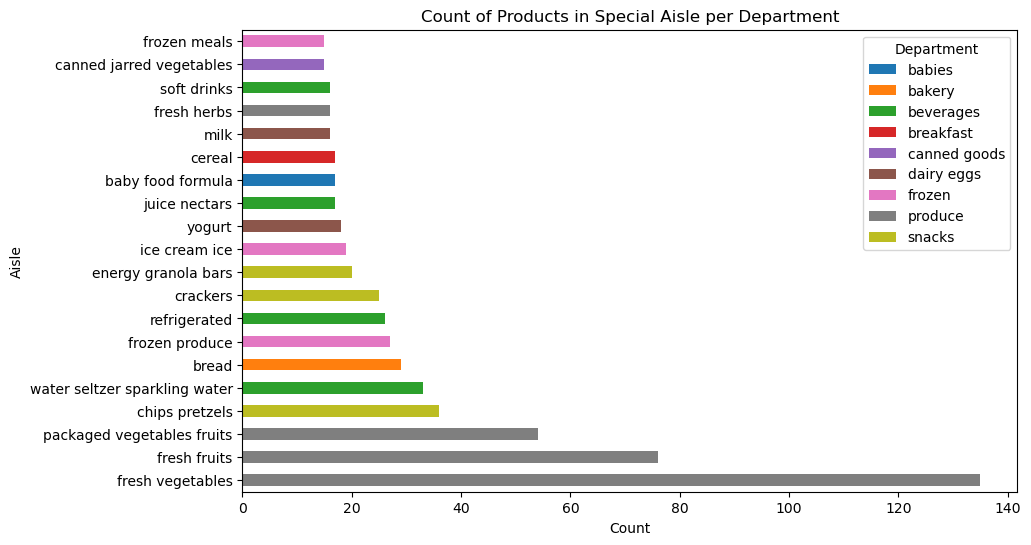

In [49]:
# Group by aisle and department, and sum the counts
grouped = aisle_department_counts.groupby(['aisle', 'department'])['count'].sum().unstack(fill_value=0)

# Sort the DataFrame by the sum of counts in each aisle in descending order
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))
# Set plot labels and title
plt.xlabel('Count')
plt.ylabel('Aisle')
plt.title('Count of Products in Special Aisle per Department')

# Customize legend location and title
plt.legend(title='Department', loc='upper right')


# Show the bar chart
plt.show()

In [50]:
# Let's see how many product are from one aisle
value_count = combine_df['aisle'].value_counts()
top_aisles = pd.DataFrame({'aisle': value_count.index, 'count': value_count.values})
top_aisles

,aisle,count
0,fresh vegetables,135
1,fresh fruits,76
2,packaged vegetables fruits,54
3,chips pretzels,36
4,water seltzer sparkling water,33
...,...,...
83,salad dressing toppings,1
84,marinades meat preparation,1
85,baby accessories,1
86,bulk grains rice dried goods,1


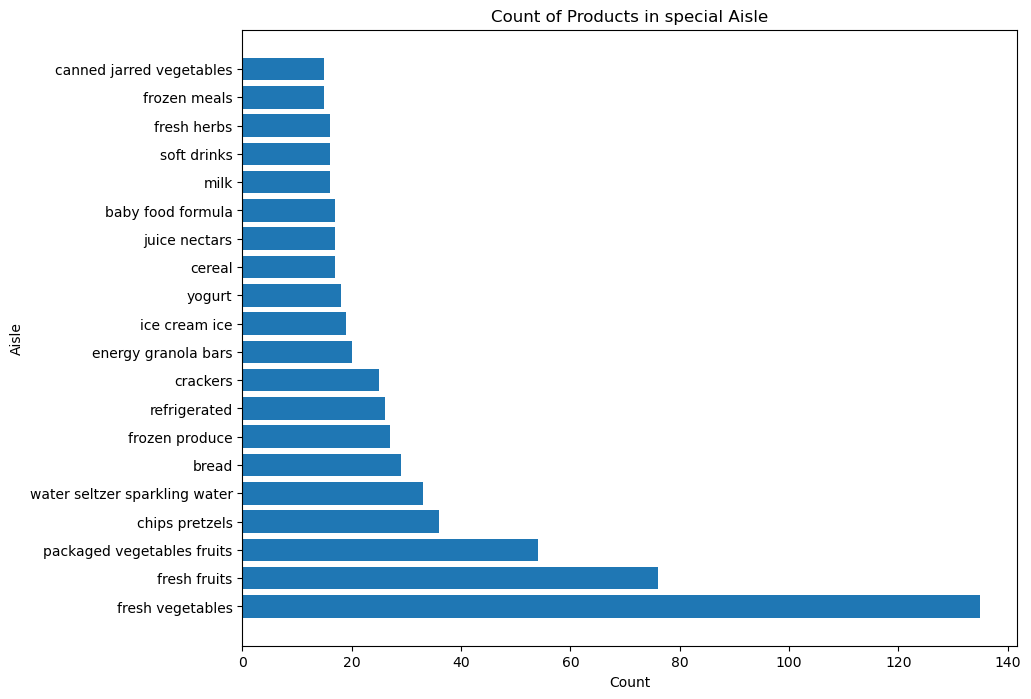

In [51]:
# Select the top 20 rows
top_aisles_selected = top_aisles.head(20)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_aisles_selected['aisle'], top_aisles_selected['count'])
plt.title('Count of Products in special Aisle')
plt.xlabel('Count')
plt.ylabel('Aisle')
plt.show()

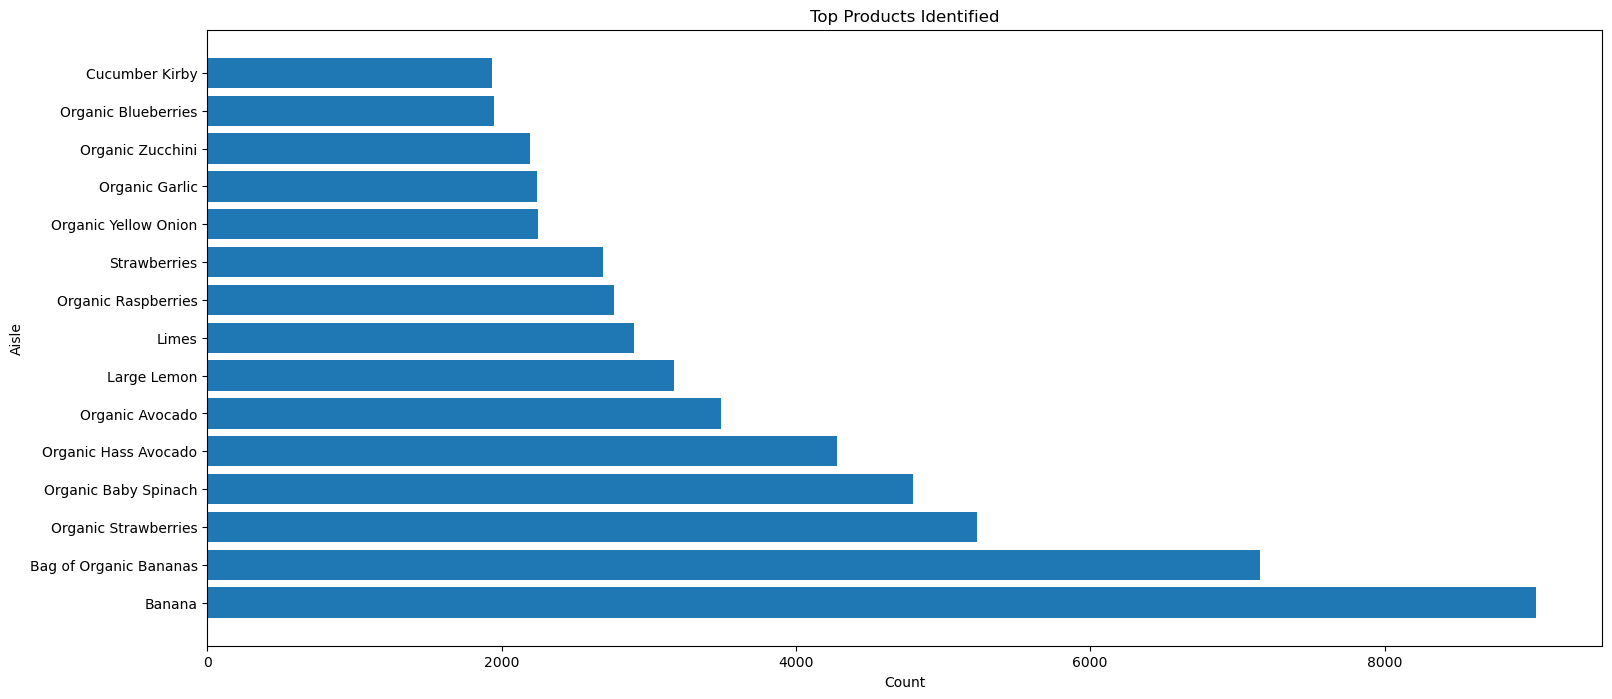

In [52]:
# Select the top 10 products
top_products = combine_df.head(15)

# Create a horizontal bar chart
plt.figure(figsize=(18, 8))
plt.barh(top_products['product_name'], top_products['count'])
plt.title('Top Products Identified')
plt.xlabel('Count')
plt.ylabel('Aisle')
plt.show()

In [53]:
# Let's look at departments proportion to products being sold
department_value_count = combine_df['department'].value_counts()
department_count = pd.DataFrame({'department': department_value_count.index,\
                                  'count': department_value_count.values})
department_count

,department,count
0,produce,294
1,snacks,122
2,beverages,101
3,frozen,100
4,dairy eggs,75
5,pantry,67
6,bakery,57
7,canned goods,48
8,dry goods pasta,40
9,breakfast,30


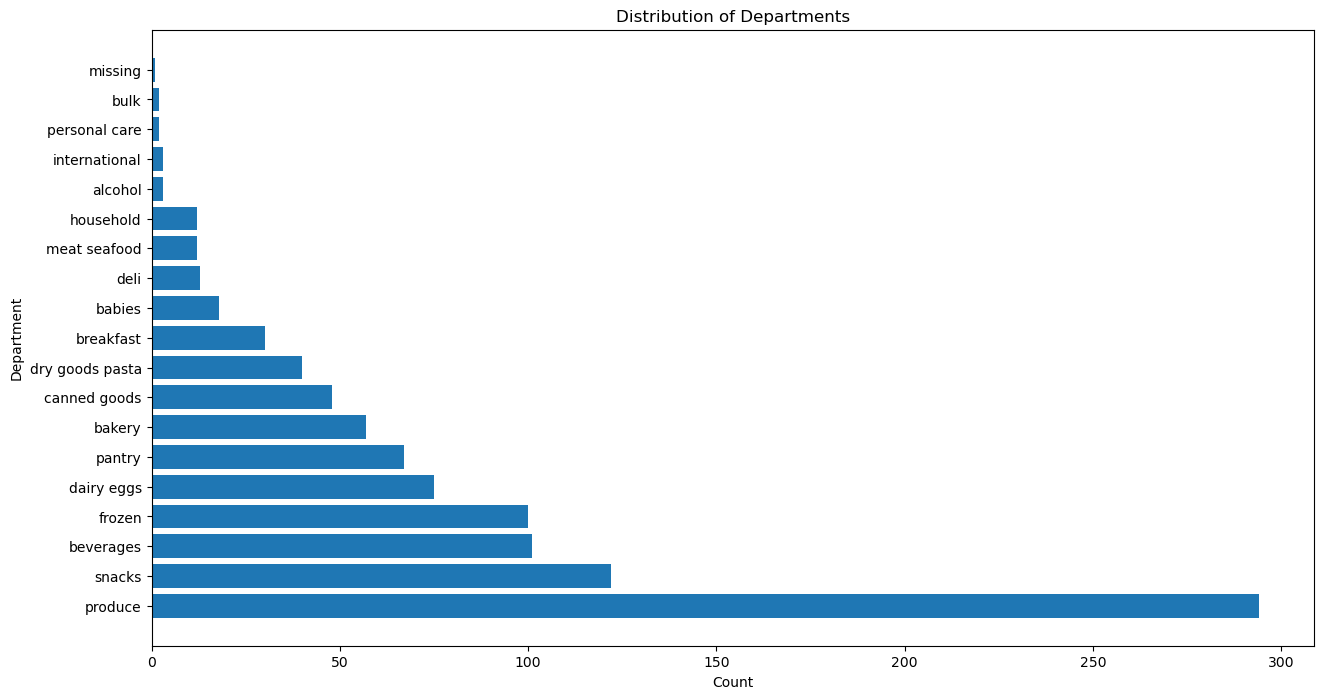

In [54]:
# Select the top 10 rows
top_department = department_count.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(15, 8))
plt.barh(department_count['department'], department_count['count'])
# for i, value in enumerate(Values):
#     plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title('Distribution of Departments')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

We can see a 1 `missing` product specified as department. Let's have a look at the product

In [55]:
# sanity check if it adds up to 1000 products
department_count['count'].sum()

1000

In [56]:
# let us see what product shows under missing department
combine_df[combine_df['department'] == 'missing']

,aisle_id,aisle,product_id,product_name,department_id,department,count
390,100,missing,41149,Organic Riced Cauliflower,21,missing,169


In [57]:
# save 1000 products to a csv file
combine_df.to_csv('1000-products-selected.csv', index=False)

In [58]:
# sanity check
df = pd.read_csv('1000-products-selected.csv')
df

,aisle_id,aisle,product_id,product_name,department_id,department,count
0,24,fresh fruits,24852,Banana,4,produce,9028
1,24,fresh fruits,13176,Bag of Organic Bananas,4,produce,7152
2,24,fresh fruits,21137,Organic Strawberries,4,produce,5233
3,123,packaged vegetables fruits,21903,Organic Baby Spinach,4,produce,4797
4,24,fresh fruits,47209,Organic Hass Avocado,4,produce,4282
...,...,...,...,...,...,...,...
995,67,fresh dips tapenades,33129,Classic Hummus,20,deli,268
996,84,milk,13249,Skim Milk,16,dairy eggs,267
997,84,milk,13166,"Organic Milk Reduced Fat, 2% Milkfat",16,dairy eggs,266
998,91,soy lactosefree,19677,Original Pure Creamy Almond Milk,16,dairy eggs,266


In [59]:
#sanity check
df.shape

(1000, 7)

## 3 Calculate the metrics

### 3.1 Calculate the metrics without accounting for the substitutes

In [60]:
# calculate total unique orders in the test data
tot_order = test_data['order_id'].nunique()
print(f"Total number of orders: {tot_order}")

Total number of orders: 49234


In [61]:
avg_item = len(test_data) / tot_order
print(f"Average number of items in each order: {avg_item:0.2f}")

Average number of items in each order: 6.91


In [62]:
# join the test data with my pick on 'product_id'
test_my_pick = test_data.merge(combine_df, on='product_id', how='left')

In [63]:
# group by 'order_id' and count the non-null values of 'product_name_y' column
metrics_tmp = test_my_pick[['order_id', 'product_name_y']].groupby('order_id')\
    .count().reset_index().rename(columns={'product_name_y': "num_prod_matching"})
metrics_tmp.tail()

,order_id,num_prod_matching
49229,99994,3
49230,99995,8
49231,99996,6
49232,99998,0
49233,99999,2


In [64]:
metrics_tmp['num_prod_matching'].value_counts().head()

1    9400
2    7781
0    6836
3    6180
4    4646
Name: num_prod_matching, dtype: int64

In [65]:
metrics_tmp['num_prod_matching'].sum()

173773

In [66]:
len(metrics_tmp)

49234

In [68]:
# calculate metric 1
# count orders with at least a match
metric_1 = len(metrics_tmp[metrics_tmp['num_prod_matching']>0])
print(f"Out of {tot_order} orders, {metric_1} of them utilize the in-aisle items. That's about {metric_1/tot_order*100:.2f}%.")

Out of 49234 orders, 42398 of them utilize the in-aisle items. That's about 86.12%.


In [69]:
# calculate metric 2
metric_2 = metrics_tmp['num_prod_matching'].sum() / len(metrics_tmp)
print(f"On average there are {avg_item:.2f} items in each order, and {metric_2:.2f} of them utilize in-aisle items. That's about {metric_2/avg_item*100:.2f}%")


On average there are 6.91 items in each order, and 3.53 of them utilize in-aisle items. That's about 51.10%
